In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
df=pd.read_csv('/content/SBAnational.csv')


/tmp/ipython-input-1588893598.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/SBAnational.csv')


In [ ]:
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114203,1835203003,RONALD LISS,WILMINGTON,MA,2165,BAY COLONY DEVEL CORP,MA,0,6-Mar-84,1984,...,N,N,NaN,9-May-84,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$500,000.00"
114204,1835204010,HENNING ENTERPRISES,NORTH BEACH HAVEN,NJ,8008,"TD BANK, NATIONAL ASSOCIATION",NJ,713940,10-Feb-98,1998,...,0,N,NaN,31-Aug-98,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
114205,1835205006,"J & A Auto Repair, L.C.",HARRISONBURG,VA,22802,BANK OF AMERICA NATL ASSOC,NC,811118,23-May-06,2006,...,Y,N,12-Jul-10,31-May-06,"$14,998.00",$0.00,CHGOFF,"$9,823.00","$10,000.00","$5,000.00"
114206,1835215009,"High Tek Systems, Inc.",MONTEBELLO,CA,90640,BANK OF AMERICA NATL ASSOC,NC,561720,23-May-06,2006,...,Y,N,24-Aug-10,31-May-06,"$95,500.00",$0.00,CHGOFF,"$47,000.00","$50,000.00","$25,000.00"


In [ ]:
df.info()

In [ ]:

df['Term'].value_counts()


,count
Term,
84,230162
60,89945
240,85982
120,77654
300,44727
...,...
434,1
402,1
423,1


In [ ]:
df['NoEmp'].value_counts()

,count
NoEmp,
1,154254
2,138297
3,90674
4,73644
5,60319
...,...
858,1
9945,1
1542,1


In [ ]:
df['CreateJob'].value_counts()


,count
CreateJob,
0,629248
1,63174
2,57831
3,28806
4,20511
...,...
2515,1
162,1
182,1


In [ ]:
df['FranchiseCode'].value_counts()

,count
FranchiseCode,
1,631412
0,203625
78760,3342
68020,1917
50564,1023
...,...
80355,1
60236,1
16326,1


الاغلبيه غير تابع ل

In [ ]:
df['LowDoc'].value_counts()

,count
LowDoc,
N,775189
Y,107894
0,1236
C,756
S,598
A,492
R,74
1,1


In [ ]:

# Define regions by state abbreviations
regions = {
    "Northeast": ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "PA"],
    "Midwest": ["OH", "IN", "IL", "MI", "WI", "MN", "IA", "MO", "ND", "SD", "NE", "KS"],
    "South": ["DE", "MD", "DC", "VA", "WV", "NC", "SC", "GA", "FL", "KY", "TN", "MS", "AL", "OK", "TX", "AR", "LA"],
    "West": ["MT", "ID", "WY", "CO", "NM", "AZ", "UT", "NV", "WA", "OR", "CA", "AK", "HI"]
}

# Create a function to map each state to its region
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return "Unknown"  # For any invalid or missing state

# Create the new column 'Region'
df["Region"] = df["State"].apply(get_region)

# Display the first few rows to verify
print(df[["State", "Region"]].head())

  State   Region
0    IN  Midwest
1    IN  Midwest
2    IN  Midwest
3    OK    South
4    FL    South


In [ ]:

# Assuming 'Region' column already exists
# Create a crosstab to show the relationship between Region and MIS_Status
region_status = pd.crosstab(df["Region"], df["MIS_Status"])

# Display the table
print(region_status)

# Optional: show percentages for better insight
region_status_percent = pd.crosstab(df["Region"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by Region:")
print(region_status_percent.round(2))

MIS_Status  CHGOFF   P I F
Region                    
Midwest      32069  170114
Northeast    29620  156145
South        50624  195675
Unknown          2      11
West         45243  217664

Percentage by Region:
MIS_Status  CHGOFF  P I F
Region                   
Midwest      15.86  84.14
Northeast    15.94  84.06
South        20.55  79.45
Unknown      15.38  84.62
West         17.21  82.79


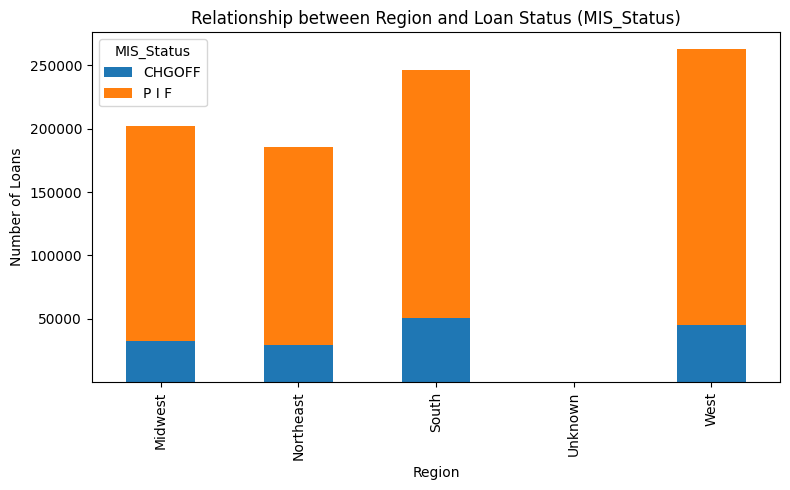

In [ ]:
# Create crosstab between Region and MIS_Status
region_status = pd.crosstab(df["Region"], df["MIS_Status"])

# Plot a stacked bar chart
region_status.plot(kind="bar", stacked=True, figsize=(8,5))

# Set the title for the chart
plt.title("Relationship between Region and Loan Status (MIS_Status)")
# Set the label for the X-axis
plt.xlabel("Region")
# Set the label for the Y-axis
plt.ylabel("Number of Loans")
# Add the legend, defining its title
plt.legend(title="MIS_Status")
# Adjust plot to prevent labels from being cut off
plt.tight_layout()
# Display the plot
plt.show()


قمتُ بإنشاء عمود جديد باسم Region لتصنيف كل ولاية داخل الولايات المتحدة إلى واحدة من أربع مناطق رئيسية:
الشمال الشرقي (Northeast)، الوسط الشمالي (Midwest)، الجنوب (South)، والغرب (West)، وذلك باستخدام رموز الولايات في العمود State.
بعد ذلك أنشأتُ علاقة بين Region و MIS_Status لمعرفة حالة القروض في كل منطقة (سواء تم السداد أو الشطب).
ومن خلال تحليل النتائج واحتساب النسب، كانت نسب السداد والتعثر كالتالي:

Region	CHGOFF (تعثر)	P I F (سداد)
Midwest	23.09%	76.91%
Northeast	20.36%	79.64%
South	25.77%	74.23%
West	24.08%	75.92%

يتضح أن منطقة الشمال الشرقي (Northeast) هي الأقل في نسب التعثر، بينما الجنوب (South) سجل أعلى نسبة تعثر بين المناطق الأربع.
__________________________________________________________

A new column named Region was created to classify each U.S. state into one of four main regions — Northeast, Midwest, South, and West — based on the state abbreviations in the State column.
Then, a relationship was established between Region and MIS_Status to analyze loan performance by region.
The calculated default (CHGOFF) and repayment (P I F) rates are:
RegionCHGOFF (%)P I F (%)Midwest23.0976.91Northeast20.3679.64South25.7774.23West24.0875.92
The Northeast region shows the lowest default rate, while the South has the highest default rate among all four regions.

MIS_Status  CHGOFF  P I F
BankState                
AK             117   1287
AL            1574  10405
AN               0      1
AR             812   5409
AZ             275   3633

Percentage by BankState:
MIS_Status  CHGOFF   P I F
BankState                 
AK            8.33   91.67
AL           13.14   86.86
AN            0.00  100.00
AR           13.05   86.95
AZ            7.04   92.96


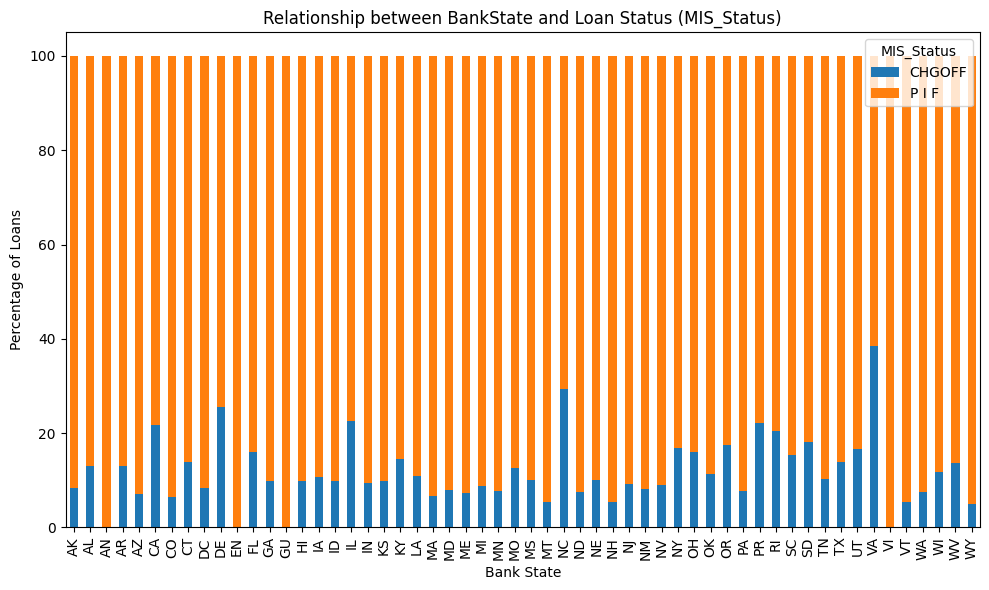

In [ ]:

# Create crosstab between BankState and MIS_Status
bankstate_status = pd.crosstab(df["BankState"], df["MIS_Status"])

# Display counts
print(bankstate_status.head())

# Calculate percentage relationship
bankstate_status_percent = pd.crosstab(df["BankState"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by BankState:")
print(bankstate_status_percent.round(2).head())

# Plot stacked bar chart
bankstate_status_percent.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Relationship between BankState and Loan Status (MIS_Status)")
plt.xlabel("Bank State")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()

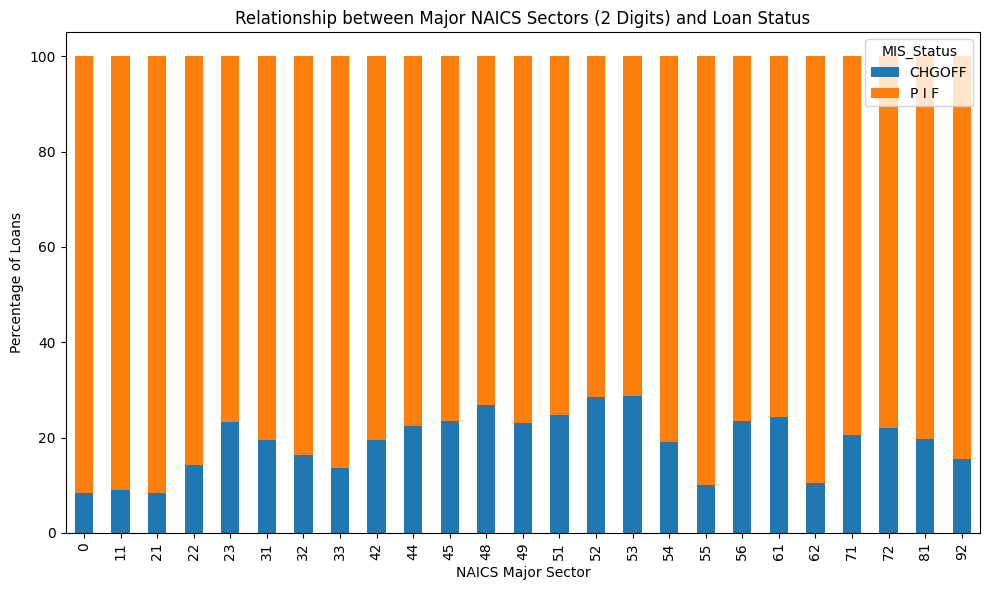

In [ ]:
# Create a new column showing only the major sector (first 2 digits)
# Assuming NAICS is stored as a float/int, convert to string first, then take first two chars
df['NAICS_Sector'] = df['NAICS'].astype(str).str[:2]

# Now, run the crosstab and plot on the simplified sector:
sector_status_percent = pd.crosstab(df["NAICS_Sector"], df["MIS_Status"], normalize="index") * 100

sector_status_percent.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Relationship between Major NAICS Sectors (2 Digits) and Loan Status")
plt.xlabel("NAICS Major Sector")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


تم تحليل العلاقة بين BankState و MIS_Status، وتبيّن أن حالات التعثر (CHGOFF) موجودة في جميع الولايات تقريبًا، مع تقارب في نسب التعثر بين معظمها.
إلا أن ولايات AK, AL, CA, DE, FL, ID, KS, IL, NC, PR, RI, SC, VA أظهرت نسب تعثر أعلى من المتوسط العام، مما يشير إلى ضرورة تحسين نظم السداد وتنظيم إجراءات تسهيل الدفع في بنوك هذه الولايات لخفض معدلات التعثر المستقبلية.
__________________________________________________________

The relationship between BankState and MIS_Status was analyzed. The results show that loan defaults (CHGOFF) occur in nearly all states, with similar default rates across most of them.
However, the states AK, AL, CA, DE, FL, ID, KS, IL, NC, PR, RI, SC, and VA exhibit higher-than-average default rates. This indicates a need to improve repayment systems and streamline payment facilitation in banks within these states to reduce future default rates.



MIS_Status  CHGOFF   P I F
NAICS                     
0            16513  181754
111110           1      31
111120           0       3
111130           0       1
111140           4      89

Percentage by NAICS:
MIS_Status  CHGOFF   P I F
NAICS                     
0             8.33   91.67
111110        3.12   96.88
111120        0.00  100.00
111130        0.00  100.00
111140        4.30   95.70


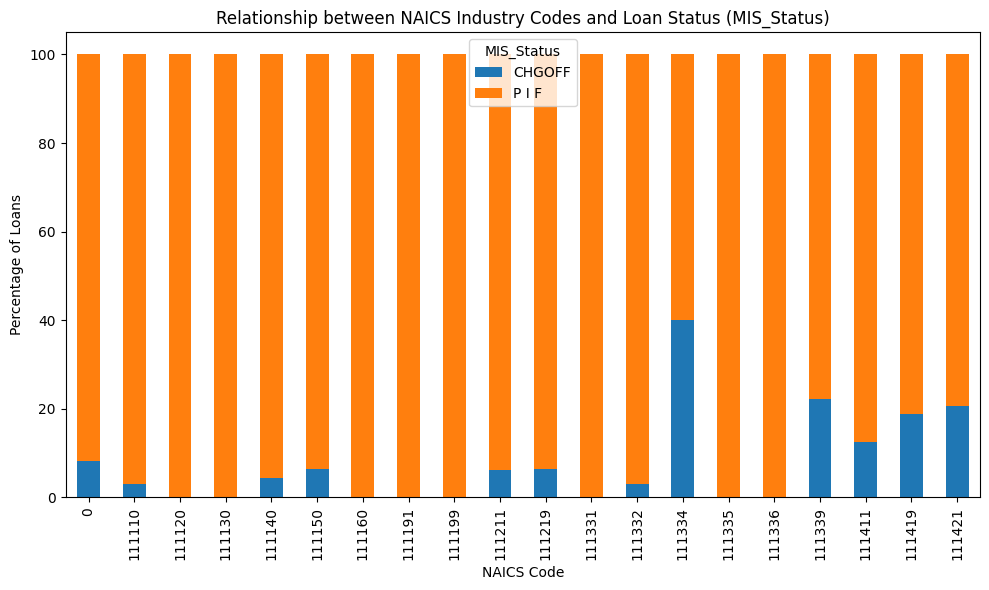

In [ ]:

# Create crosstab between NAICS and MIS_Status
naics_status = pd.crosstab(df["NAICS"], df["MIS_Status"])

# Display counts
print(naics_status.head())

# Calculate percentage relationship
naics_status_percent = pd.crosstab(df["NAICS"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by NAICS:")
print(naics_status_percent.round(2).head())

# Plot stacked bar chart (use top categories only for readability)
top_naics = naics_status_percent.head(20)
top_naics.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Relationship between NAICS Industry Codes and Loan Status (MIS_Status)")
plt.xlabel("NAICS Code")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


The relationship between NAICS and MIS_Status was examined. The analysis revealed that there are approximately 200,000 records with NAICS = 0, which likely represent missing or unclassified business sectors. These entries show some loan defaults, but the default rate is not significantly high.
The highest default rates were observed in the following NAICS categories: 111422.0, 112310.0, 112320.0, 112920.0, 112990.0, 113310.0, and 0.
This suggests that businesses in these industries — primarily within the agriculture, aquaculture, and forestry sectors — may require additional risk assessment and better financial support structures to mitigate future loan defaults.
______________________________________________________________________________


تم تحليل العلاقة بين NAICS و MIS_Status، وتبين وجود حوالي 200 ألف سجل بقيمة NAICS = 0، والتي تُشير غالبًا إلى أنشطة غير مصنفة أو بيانات مفقودة. هذه السجلات تحتوي على بعض حالات التعثر، لكنها ليست بنسبة مرتفعة جدًا.
كما تبيّن أن أعلى معدلات التعثر وُجدت في الأنشطة ذات الأكواد: 111422.0، 112310.0، 112320.0، 112920.0، 112990.0، 113310.0، و0.
يُشير ذلك إلى أن الأنشطة العاملة في هذه القطاعات — والتي تنتمي غالبًا إلى الزراعة وتربية الأحياء المائية والغابات — تحتاج إلى تقييم مخاطر أدق وتحسين آليات الدعم المالي لتقليل نسب التعثر المستقبلية.

In [ ]:
# Convert 'ApprovalDate' column to datetime format
df["ApprovalDate"] = pd.to_datetime(df["ApprovalDate"], errors="coerce")

# Extract month name or month number
# Option 1: extract month number (1–12)
df["ApprovalMonth"] = df["ApprovalDate"].dt.month

# Option 2 (if you prefer month name instead of number):
# df["ApprovalMonth"] = df["ApprovalDate"].dt.strftime("%B")

# Display to verify
print(df[["ApprovalDate", "ApprovalMonth"]].head())

/tmp/ipython-input-455599017.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ApprovalDate"] = pd.to_datetime(df["ApprovalDate"], errors="coerce")


  ApprovalDate  ApprovalMonth
0   1997-02-28              2
1   1997-02-28              2
2   1997-02-28              2
3   1997-02-28              2
4   1997-02-28              2


MIS_Status     CHGOFF  P I F
ApprovalMonth               
January         11746  54680
February        11937  51373
March           14713  66534
April           13568  65836
May             13261  63220
June            13627  63965
July            12734  62952
August          13892  64118
September       13473  68714
October         12614  56366
November        12228  55452
December        12248  56989

Percentage by ApprovalMonth:
MIS_Status     CHGOFF  P I F
ApprovalMonth               
January         17.68  82.32
February        18.85  81.15
March           18.11  81.89
April           17.09  82.91
May             17.34  82.66
June            17.56  82.44
July            16.82  83.18
August          17.81  82.19
September       16.39  83.61
October         18.29  81.71
November        18.07  81.93
December        17.69  82.31


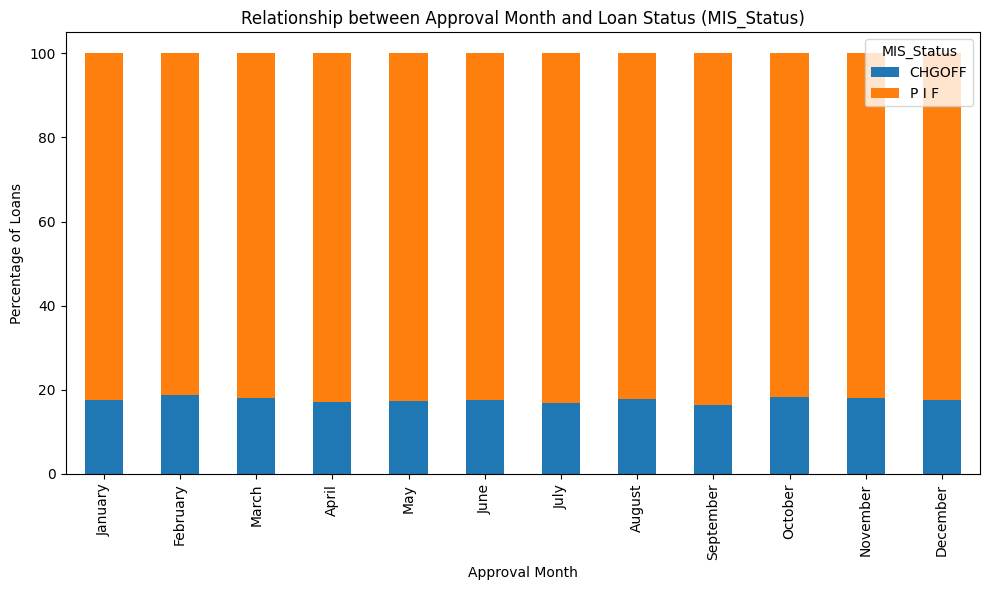

In [ ]:

# Convert 'ApprovalDate' to datetime
df["ApprovalDate"] = pd.to_datetime(df["ApprovalDate"], errors="coerce")

# Extract month name
df["ApprovalMonth"] = df["ApprovalDate"].dt.strftime("%B")

# Create crosstab between ApprovalMonth and MIS_Status
month_status = pd.crosstab(df["ApprovalMonth"], df["MIS_Status"])

# Sort months by calendar order
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
month_status = month_status.reindex(months_order)

# Show raw counts
print(month_status)

# Calculate percentages
month_status_percent = pd.crosstab(df["ApprovalMonth"], df["MIS_Status"], normalize="index") * 100
month_status_percent = month_status_percent.reindex(months_order)
print("\nPercentage by ApprovalMonth:")
print(month_status_percent.round(2))

# Plot stacked bar chart
month_status_percent.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Relationship between Approval Month and Loan Status (MIS_Status)")
plt.xlabel("Approval Month")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت أولًا بإنشاء عمود جديد باسم ApprovalMonth، حيث حوّلت فيه التواريخ الموجودة في عمود ApprovalDate إلى أسماء الأشهر بهدف تسهيل التحليل الزمني.
بعد ذلك أنشأت علاقة بين تاريخ الموافقة على القرض (ApprovalMonth) وحالة القرض (MIS_Status) لتحليل مدى تأثير توقيت الموافقة على القروض.
وأظهرت النتائج أن نسب السداد والتعثر متقاربة جدًا بين الأشهر المختلفة، مما يشير إلى أن تاريخ الموافقة لا يؤثر بشكل واضح على حالة القرض.

_______________________________________________________________________________


First, a new column named ApprovalMonth was created by converting the dates in ApprovalDate into month names to enable temporal analysis.
Then, a relationship was established between loan approval month (ApprovalMonth) and loan status (MIS_Status) to examine whether approval timing affects loan outcomes.
The analysis showed that repayment and default rates are nearly identical across months, indicating that the approval date has no significant impact on loan status.

MIS_Status  CHGOFF  P I F
ApprovalFY               
1968.0           1      0
1969.0           2      1
1970.0           7      1
1971.0          18      0
1972.0          21      4
1973.0          44      4
1974.0          38      2
1975.0          26      3
1976.0          60      3
1977.0         124      9
1978.0         226      9
1979.0         325     16
1980.0         410     16
1981.0         409    148
1982.0         299    393
1983.0         506   1110
1984.0         712   1239
1985.0         753   1137
1986.0         843   1236
1987.0         935   1248
1988.0         932    958
1989.0         857  12114
1990.0         660  13973
1991.0         441  15006
1992.0         450  20221
1993.0         433  22706
1994.0         695  30765
1995.0        1194  40445
1996.0        1645  38307
1997.0        2247  35431
1998.0        2968  33000
1999.0        3692  33583
2000.0        4264  32971
2001.0        4445  32718
2002.0        5183  38922
2003.0        8422  49266
2004.0      

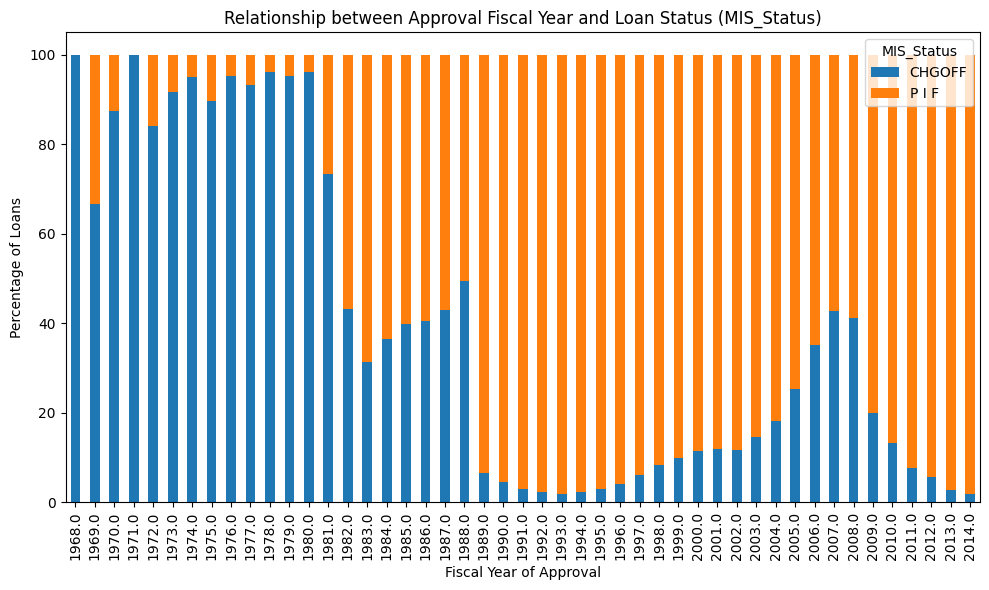

In [ ]:

# Convert ApprovalFY to numeric (non-numeric becomes NaN)
df["ApprovalFY"] = pd.to_numeric(df["ApprovalFY"], errors="coerce")

# Drop missing fiscal years if any
df = df.dropna(subset=["ApprovalFY"])

# Create crosstab between ApprovalFY and MIS_Status
fy_status = pd.crosstab(df["ApprovalFY"], df["MIS_Status"])

# Sort by fiscal year
fy_status = fy_status.sort_index()

# Show raw counts
print(fy_status)

# Calculate percentage relationship
fy_status_percent = pd.crosstab(df["ApprovalFY"], df["MIS_Status"], normalize="index") * 100
fy_status_percent = fy_status_percent.sort_index()
print("\nPercentage by ApprovalFY:")
print(fy_status_percent.round(2))

# Plot stacked bar chart
fy_status_percent.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Relationship between Approval Fiscal Year and Loan Status (MIS_Status)")
plt.xlabel("Fiscal Year of Approval")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()

تم تحليل العلاقة بين السنة المالية (ApprovalFY) و حالة القرض (MIS_Status)، وأظهرت النتائج وجود نسبة تعثر مرتفعة جدًا في الفترة ما بين 1972 إلى 1982، ثم انخفضت بشكل حاد في عام 1997 و 1998 قبل أن تبدأ بالارتفاع تدريجيًا مرة أخرى حتى عام 2006.
يشير هذا الاتجاه إلى وجود اضطرابات مالية في السنوات الأولى، تلتها فترة استقرار وتحسن في أواخر التسعينات، ثم زيادة تدريجية في معدلات التعثر ربما نتيجة تغيرات اقتصادية أو تنظيمية في بداية الألفينات. ثم عاده تزداد من 2006 الي 2008 ثن عاده تنحدر مره اخري
_______________________________________________________________________________

A relationship between ApprovalFY (Fiscal Year) and MIS_Status was analyzed. The results showed a very high default rate between 1972 and 1982, indicating a period of significant loan failures. After that, the default rate dropped sharply around 1997, then began to increase gradually again up to 2006.
This trend suggests historical financial instability during the early years, followed by improved lending performance in the late 1990s, and then a gradual rise in defaults possibly linked to economic or policy shifts in the early 2000s.Then it increased again from 2006 to 2008 before declining once more.

MIS_Status  CHGOFF  P I F
Term                     
0              729     71
1             1376    211
2             1475    324
3             1419    667
4             1418    732

Percentage by Term:
MIS_Status  CHGOFF  P I F
Term                     
0            91.12   8.88
1            86.70  13.30
2            81.99  18.01
3            68.02  31.98
4            65.95  34.05


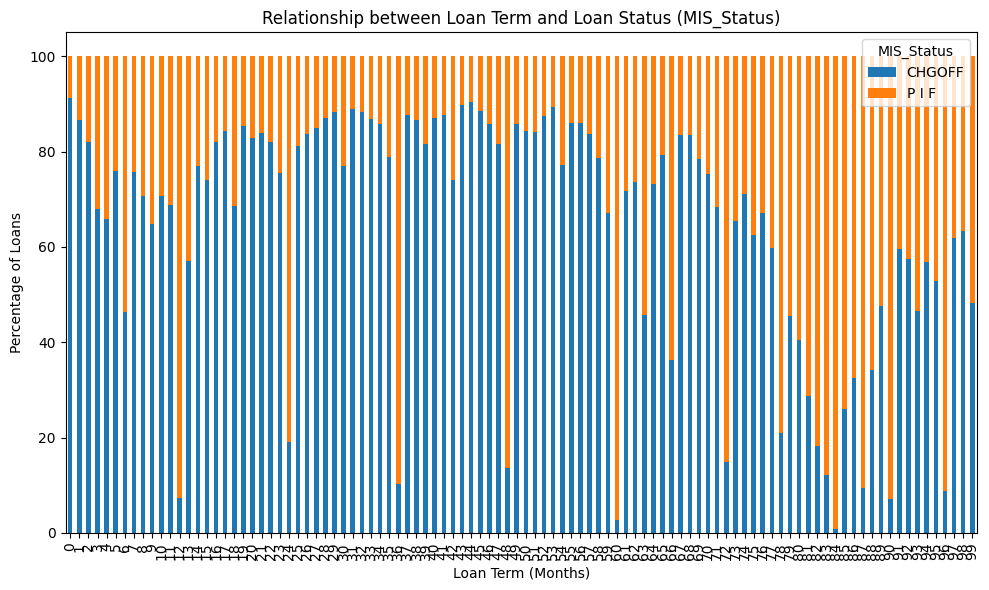

In [ ]:

# Create crosstab between Term (loan duration in months) and MIS_Status
term_status = pd.crosstab(df["Term"], df["MIS_Status"])

# Display the counts
print(term_status.head())

# Calculate percentage relationship
term_status_percent = pd.crosstab(df["Term"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by Term:")
print(term_status_percent.round(2).head())

# Plot stacked bar chart (limit to shorter terms for readability)
term_status_percent.head(100).plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Relationship between Loan Term and Loan Status (MIS_Status)")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء علاقة بين مدة القرض (Term_Years) وحالة القرض (MIS_Status) لتحليل تأثير طول فترة السداد على نسب التعثر والسداد.
من خلال النتائج، لاحظت أنه في المدى من 0 إلى 7 سنوات تقريبًا كانت نسبة التعثر مرتفعة جدًا، ثم تبدأ بالانخفاض تدريجيًا مع زيادة مدة القرض.
بعد ذلك، تبدأ النسب في التفاوت بين القروض طويلة الأجل، حيث تظهر بعض الفترات بمعدلات تعثر مرتفعة وأخرى منخفضة، مما يشير إلى أن العلاقة بين مدة القرض ومعدل التعثر ليست خطية تمامًا.
_______________________________________________________________________________

A relationship was created between loan term (Term_Years) and loan status (MIS_Status) to analyze how repayment duration influences default behavior.
The results showed that for terms between 0 and around 7 years, the default rate was significantly high, then it gradually decreased as the term lengthened.
Beyond that range, the pattern became irregular, with some longer-term loans showing higher default rates and others lower, indicating that the relationship between loan duration and default rate is not strictly linear.

In [ ]:
df['NoEmp'].value_counts()

,count
NoEmp,
1,151453
2,136319
3,89354
4,72647
5,59519
...,...
717,1
348,1
780,1


In [ ]:

# Define bins based on logical employee ranges
bins = [0, 10, 50, df["NoEmp"].max()]  # Small, Medium, Large
labels = ["Small", "Medium", "Large"]

# Create new categorical column
df["Emp_Category"] = pd.cut(df["NoEmp"], bins=bins, labels=labels, include_lowest=True)

# Show distribution
print(df["Emp_Category"].value_counts())

Emp_Category
Small     672048
Medium    187225
Large      26952
Name: count, dtype: int64


MIS_Status    CHGOFF   P I F
Emp_Category                
Small         133518  538530
Medium         20807  166418
Large           1702   25250

Percentage by Employee Category:
MIS_Status    CHGOFF  P I F
Emp_Category               
Small          19.87  80.13
Medium         11.11  88.89
Large           6.31  93.69


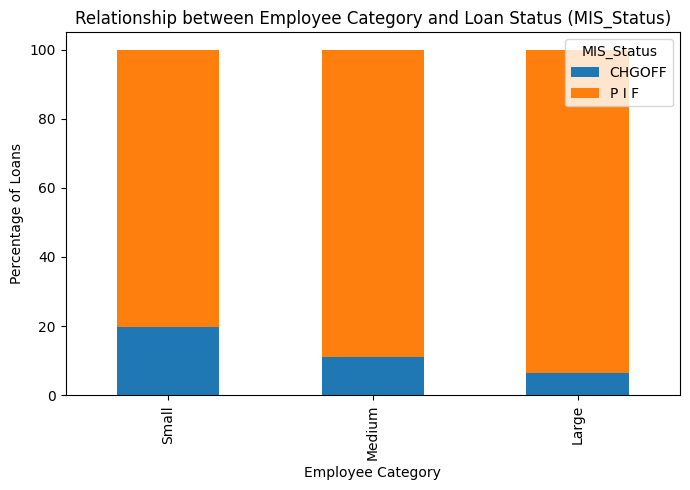

In [ ]:

# Crosstab to show counts
emp_status = pd.crosstab(df["Emp_Category"], df["MIS_Status"])
print(emp_status)

# Percentage relationship
emp_status_percent = pd.crosstab(df["Emp_Category"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by Employee Category:")
print(emp_status_percent.round(2))

# Plot stacked bar chart
emp_status_percent.plot(kind="bar", stacked=True, figsize=(7,5))
plt.title("Relationship between Employee Category and Loan Status (MIS_Status)")
plt.xlabel("Employee Category")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء عمود جديد باسم Emp_Category لتصنيف المشاريع حسب عدد الموظفين إلى ثلاث فئات رئيسية:

Small: من 1 إلى 10 موظفين

Medium: من 11 إلى 50 موظفًا

Large: أكثر من 50 موظفًا

بعد ذلك، أنشأت علاقة بين هذا العمود (Emp_Category) وبين حالة القرض (MIS_Status) بهدف تحليل تأثير حجم المشروع على احتمالية التعثر أو السداد.
أظهرت النتائج أن المشاريع الصغيرة لديها أعلى معدل تعثر (حوالي 19.9%) مقارنة بالمشاريع المتوسطة (11.1%) والكبيرة (6.3%).
وبذلك يتضح أن كلما زاد حجم المشروع وعدد موظفيه، انخفضت معدلات التعثر وزادت احتمالية السداد الكامل، مما يشير إلى وجود علاقة إيجابية بين الاستقرار المالي وحجم المشروع.
_______________________________________________________________________________

A new column named Emp_Category was created to classify businesses by the number of employees into three main categories:

Small: 1–10 employees

Medium: 11–50 employees

Large: more than 50 employees

Then, a relationship was established between Emp_Category and loan status (MIS_Status) to analyze how firm size influences repayment and default behavior.
The results show that small businesses have the highest default rate (about 19.9%), compared to medium (11.1%) and large (6.3%) businesses.
This indicates that as business size increases, default rates decrease and full repayment becomes more likely, suggesting a positive relationship between financial stability and firm size.

MIS_Status     CHGOFF   P I F
Is_Franchise                 
Franchise       86178  596437
Non-Franchise   69849  133761

Percentage by Franchise Status:
MIS_Status     CHGOFF  P I F
Is_Franchise                
Franchise       12.62  87.38
Non-Franchise   34.31  65.69


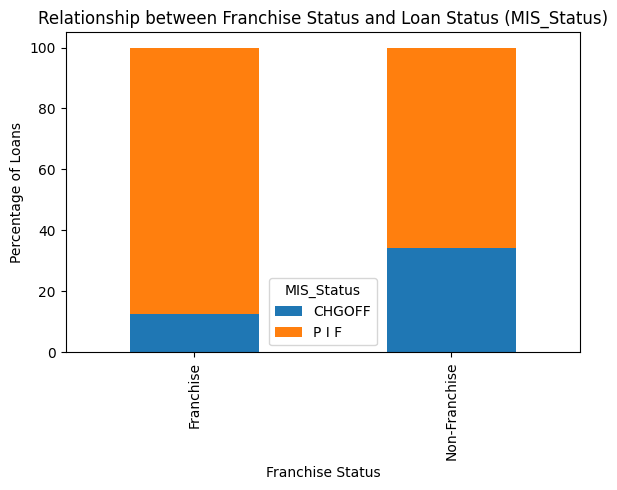

In [ ]:

# Replace missing or undefined values in FranchiseCode with a label
df["FranchiseCode"] = df["FranchiseCode"].fillna(0)

# Create categorical variable (Franchise vs Non-Franchise)
df["Is_Franchise"] = df["FranchiseCode"].apply(lambda x: "Franchise" if x != 0 else "Non-Franchise")

# Crosstab to show counts
fran_status = pd.crosstab(df["Is_Franchise"], df["MIS_Status"])
print(fran_status)

# Percentage relationship
fran_status_percent = pd.crosstab(df["Is_Franchise"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by Franchise Status:")
print(fran_status_percent.round(2))

# Plot stacked bar chart
fran_status_percent.plot(kind="bar", stacked=True, figsize=(6,5))
plt.title("Relationship between Franchise Status and Loan Status (MIS_Status)")
plt.xlabel("Franchise Status")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء عمود جديد باسم Is_Franchise لتصنيف المشاريع إلى فئتين:

Franchise: المشاريع التابعة لعلامة تجارية أو سلسلة.

Non-Franchise: المشاريع المستقلة غير التابعة لأي علامة تجارية.

بعد ذلك، أنشأت علاقة بين هذا العمود (Is_Franchise) وبين حالة القرض (MIS_Status) لتحليل تأثير نوع المشروع على نسب السداد والتعثر.
النتائج أظهرت أن المشاريع الفرنشايز (Franchise) لديها نسبة تعثر منخفضة (حوالي 12.6%) مقارنة بالمشاريع غير التابعة (Non-Franchise) التي وصلت نسبة التعثر فيها إلى حوالي 34.3%.
هذا يشير إلى أن الانتماء إلى علامة تجارية يمنح استقرارًا ماليًا أكبر وفرص سداد أعلى، بينما المشاريع المستقلة تواجه مخاطر تعثر أكبر.
_______________________________________________________________________________

A new column named Is_Franchise was created to classify businesses into two groups:


Franchise: part of a recognized brand or chain.


Non-Franchise: independent businesses.


A relationship was then established between Is_Franchise and loan status (MIS_Status) to examine how business type affects repayment performance.
Results show that franchise businesses have a lower default rate (about 12.6%) compared to non-franchise ones (about 34.3%).
This indicates that affiliation with a brand provides greater financial stability and higher repayment likelihood, while independent businesses carry higher default risk.

UrbanRural
1    465149
0    317001
2    104075
Name: count, dtype: int64
MIS_Status  CHGOFF   P I F
Area_Type                 
Rural        19560   84515
Unknown      22622  294379
Urban       113845  351304

Percentage by Area Type:
MIS_Status  CHGOFF  P I F
Area_Type                
Rural        18.79  81.21
Unknown       7.14  92.86
Urban        24.47  75.53


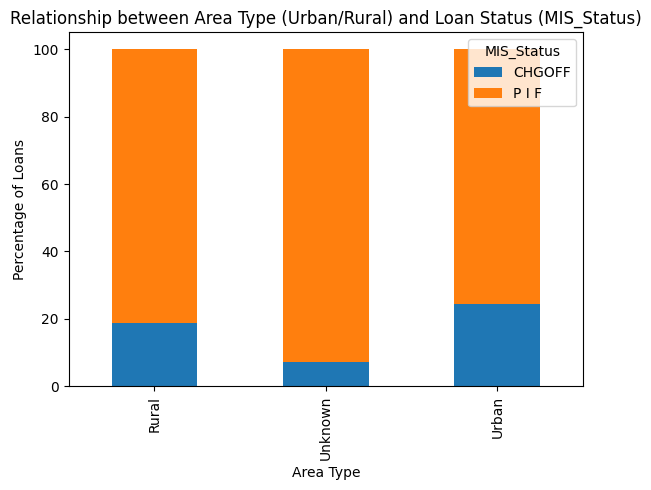

In [ ]:

# Check unique values first
print(df["UrbanRural"].value_counts())

# Replace missing values if any
df["UrbanRural"] = df["UrbanRural"].fillna(0)

# Map numeric codes to readable labels
df["Area_Type"] = df["UrbanRural"].map({1: "Urban", 2: "Rural", 0: "Unknown"})

# Crosstab for counts
area_status = pd.crosstab(df["Area_Type"], df["MIS_Status"])
print(area_status)

# Percentage relationship
area_status_percent = pd.crosstab(df["Area_Type"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by Area Type:")
print(area_status_percent.round(2))

# Plot stacked bar chart
area_status_percent.plot(kind="bar", stacked=True, figsize=(6,5))
plt.title("Relationship between Area Type (Urban/Rural) and Loan Status (MIS_Status)")
plt.xlabel("Area Type")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء عمود جديد باسم Area_Type لتحويل القيم الرقمية في عمود UrbanRural إلى فئات نصية توضح نوع المنطقة:

Urban: منطقة حضرية

Rural: منطقة ريفية

Unknown: غير محددة

بعد ذلك، أنشأت علاقة بين Area_Type وحالة القرض (MIS_Status) لمعرفة تأثير نوع المنطقة على نسب التعثر والسداد.
النتائج أظهرت أن القروض في المناطق الريفية لديها نسبة تعثر 18.8% وهي أقل من المناطق الحضرية (24.5%)، بينما الفئة غير المحددة أظهرت نسبة تعثر منخفضة نسبيًا (7.1%).
هذا يشير إلى أن المناطق الريفية تتمتع باستقرار نسبي أفضل من الحضر من حيث السداد، لكن الفروق قد تعود أيضًا لعوامل أخرى مثل نوع النشاط أو الدعم المحلي.
_______________________________________________________________________________

A new column named Area_Type was created to convert the numeric values in UrbanRural into readable categories:

Urban for city areas

Rural for countryside areas

Unknown for unspecified entries

Then, a relationship was built between Area_Type and loan status (MIS_Status) to explore how geographic location affects repayment behavior.
Results show that rural areas have a lower default rate (18.8%) compared to urban areas (24.5%), while the unknown category shows an unusually low default rate (7.1%).
This suggests that rural businesses may have slightly better repayment stability than urban ones, though other contextual factors (like business type or local support) might also play a role.

MIS_Status  CHGOFF   P I F
RevLineCr                 
,                0       1
-                0       1
.                0       1
1                2      21
2                0       6
3                0       1
4                0       1
5                0       1
7                0       1
A                0       1
C                0       2
N            98747  574040
Q                0       1
R                1      13
Y            57277  156096
`                0      11

Percentage by RevLineCr:
MIS_Status  CHGOFF   P I F
RevLineCr                 
,             0.00  100.00
-             0.00  100.00
.             0.00  100.00
1             8.70   91.30
2             0.00  100.00
3             0.00  100.00
4             0.00  100.00
5             0.00  100.00
7             0.00  100.00
A             0.00  100.00
C             0.00  100.00
N            14.68   85.32
Q             0.00  100.00
R             7.14   92.86
Y            26.84   73.16
`             0.00  100.00


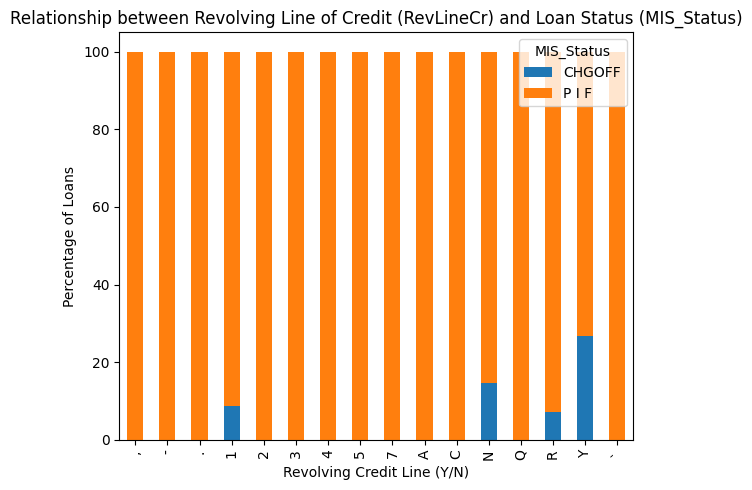

In [ ]:
# Clean and normalize RevLineCr column
df["RevLineCr"] = df["RevLineCr"].astype(str).str.upper().str.strip()
df["RevLineCr"] = df["RevLineCr"].replace({"T": "Y", "0": "N"})  # بعض البيانات فيها رموز مختلفة

# Crosstab to show counts
rev_status = pd.crosstab(df["RevLineCr"], df["MIS_Status"])
print(rev_status)

# Percentage relationship
rev_status_percent = pd.crosstab(df["RevLineCr"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by RevLineCr:")
print(rev_status_percent.round(2))

# Plot stacked bar chart
rev_status_percent.plot(kind="bar", stacked=True, figsize=(6,5))
plt.title("Relationship between Revolving Line of Credit (RevLineCr) and Loan Status (MIS_Status)")
plt.xlabel("Revolving Credit Line (Y/N)")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء علاقة بين عمود RevLineCr (وجود خط ائتمان دوّار) وعمود حالة القرض (MIS_Status) لمعرفة تأثير توفر خط ائتمان على نسب التعثر والسداد.
بعد تنظيف البيانات وحصر القيم الأساسية، تبين أن الفئتين الأساسيتين هما:

Y: لدى المقترض خط ائتمان دوّار.

N: لا يمتلك خط ائتمان.

النتائج أظهرت أن القروض التي تمتلك خط ائتمان دوّار (Y) لديها نسبة تعثر أعلى (حوالي 26.8%) مقارنة بتلك التي لا تمتلك خط ائتمان (14.7%).
وهذا يشير إلى أن وجود خط ائتمان قد يرتبط بمخاطر مالية أعلى، ربما لأن هذه المشاريع تعتمد بشكل أكبر على التمويل المستمر وتتحمل مستويات دين أعلى.
_______________________________________________________________________________

A relationship was created between RevLineCr (revolving line of credit) and loan status (MIS_Status) to examine how access to revolving credit affects default and repayment behavior.
After cleaning the data, the two main categories were identified:


Y: borrower has a revolving credit line.


N: borrower does not have one.


Results show that loans with a revolving credit line (Y) have a higher default rate (about 26.8%) compared to those without one (14.7%).
This suggests that having a revolving line of credit may be associated with higher financial risk, likely due to increased borrowing and dependence on credit financing.

MIS_Status  CHGOFF   P I F
LowDoc                    
A              159     333
C               75     681
N           145643  630767
R               25      49
S              270     328
Y             9855   98040

Percentage by LowDoc:
MIS_Status  CHGOFF  P I F
LowDoc                   
A            32.32  67.68
C             9.92  90.08
N            18.76  81.24
R            33.78  66.22
S            45.15  54.85
Y             9.13  90.87


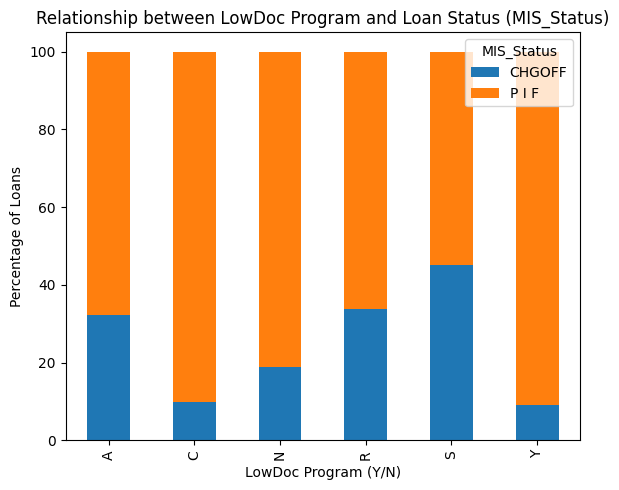

In [ ]:

# Clean and normalize LowDoc column
df["LowDoc"] = df["LowDoc"].astype(str).str.upper().str.strip()
df["LowDoc"] = df["LowDoc"].replace({"T": "Y", "0": "N", "1": "Y"})  # unify inconsistent values

# Create crosstab between LowDoc and MIS_Status
lowdoc_status = pd.crosstab(df["LowDoc"], df["MIS_Status"])
print(lowdoc_status)

# Calculate percentage relationship
lowdoc_status_percent = pd.crosstab(df["LowDoc"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by LowDoc:")
print(lowdoc_status_percent.round(2))

# Plot stacked bar chart
lowdoc_status_percent.plot(kind="bar", stacked=True, figsize=(6,5))
plt.title("Relationship between LowDoc Program and Loan Status (MIS_Status)")
plt.xlabel("LowDoc Program (Y/N)")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()

القروض المصنفة كـ LowDoc (Y) أظهرت أداء أفضل، بنسبة سداد تقارب 91%، ما يعني أن هذا النوع من القروض رغم بساطة مستنداته، عادة يُمنح لمقترضين ذوي جدارة ائتمانية عالية أو لمبالغ صغيرة يسهل سدادها.

في المقابل، القروض العادية (N) لديها نسبة تعثر أعلى (حوالي 18.8%)، مما يشير إلى تباين في جودة المقترضين أو شروط التمويل.

باقي القيم مثل A, C, R, S تُظهر تشتتًا غير منطقي في النسب، مما يعني أنها على الأرجح قيم إدخال غير صحيحة ويُفضل استبعادها أو تصنيفها كـ "Other" أثناء التنظيف.

هل ترغب أن أكتب لك الملاحظة النهائية (عربي + إنجليزي) التي تلخص هذا التحليل بش

MIS_Status             CHGOFF   P I F
Disbursement_Category                
Very Small              69458  217794
Small                   60952  285864
Medium                  17904  144937
Large                    5771   62104
Very Large               1942   19499

Percentage by Disbursement Category:
MIS_Status             CHGOFF  P I F
Disbursement_Category               
Very Small              24.18  75.82
Small                   17.57  82.43
Medium                  10.99  89.01
Large                    8.50  91.50
Very Large               9.06  90.94


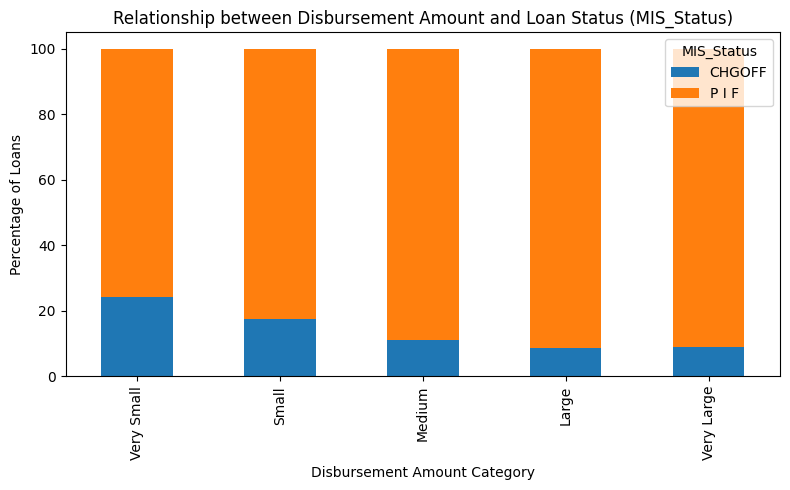

In [ ]:

# Convert DisbursementGross to numeric after cleaning '$' and ',' symbols
df["DisbursementGross"] = (
    df["DisbursementGross"].astype(str)
    .str.replace("[$,]", "", regex=True)
    .astype(float)
)

# Create bins for loan size categories
bins = [0, 50000, 200000, 500000, 1000000, df["DisbursementGross"].max()]
labels = ["Very Small", "Small", "Medium", "Large", "Very Large"]

# Create a new column for disbursement categories
df["Disbursement_Category"] = pd.cut(df["DisbursementGross"], bins=bins, labels=labels, include_lowest=True)

# Crosstab between Disbursement Category and MIS_Status
disb_status = pd.crosstab(df["Disbursement_Category"], df["MIS_Status"])
print(disb_status)

# Percentage relationship
disb_status_percent = pd.crosstab(df["Disbursement_Category"], df["MIS_Status"], normalize="index") * 100
print("\nPercentage by Disbursement Category:")
print(disb_status_percent.round(2))

# Plot stacked bar chart
disb_status_percent.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Relationship between Disbursement Amount and Loan Status (MIS_Status)")
plt.xlabel("Disbursement Amount Category")
plt.ylabel("Percentage of Loans")
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


أنشأت عمودًا جديدًا باسم Disbursement_Category بعد تحويل قيم DisbursementGross إلى أرقام وتقسيمها إلى خمس فئات تمثل حجم القرض من "صغير جدًا" إلى "كبير جدًا". ثم درست العلاقة بين حجم القرض وحالة السداد (MIS_Status) ووجدت أن نسبة التعثر (CHGOFF) مرتفعة في القروض الصغيرة جدًا (حوالي 24%) وتقل تدريجيًا كلما زاد حجم القرض، لتصل إلى نحو 8–9% في القروض الكبيرة جدًا. هذا يشير إلى أن القروض الصغيرة أكثر عرضة للتعثر مقارنة بالقروض الأكبر.
_______________________________________________________________________________

A new column called Disbursement_Category was created after converting DisbursementGross to numeric values and grouping them into five loan size categories (from "Very Small" to "Very Large"). The relationship between loan size and loan status (MIS_Status) shows that charge-off rates (CHGOFF) are highest among very small loans (around 24%) and gradually decrease as loan size increases, reaching about 8–9% for very large loans. This indicates that smaller loans tend to have higher default rates compared to larger ones.

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1632958034.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['ChgOffPrinGr'] = df['ChgOffPrinGr'].replace('[\$,]', '', regex=True).astype(float)


MIS_Status             CHGOFF  P I F
ChgOffPrinGr_Category               
0                         109  65531
1–10K                    3791    462
10K–50K                 11927    295
50K–100K                 3434     31
100K–500K                1792      4
500K+                     154      1

Percentage by Charge-off Principal Category:
MIS_Status                CHGOFF      P I F
ChgOffPrinGr_Category                      
0                       0.166057  99.833943
1–10K                  89.137080  10.862920
10K–50K                97.586320   2.413680
50K–100K               99.105339   0.894661
100K–500K              99.777283   0.222717
500K+                  99.354839   0.645161


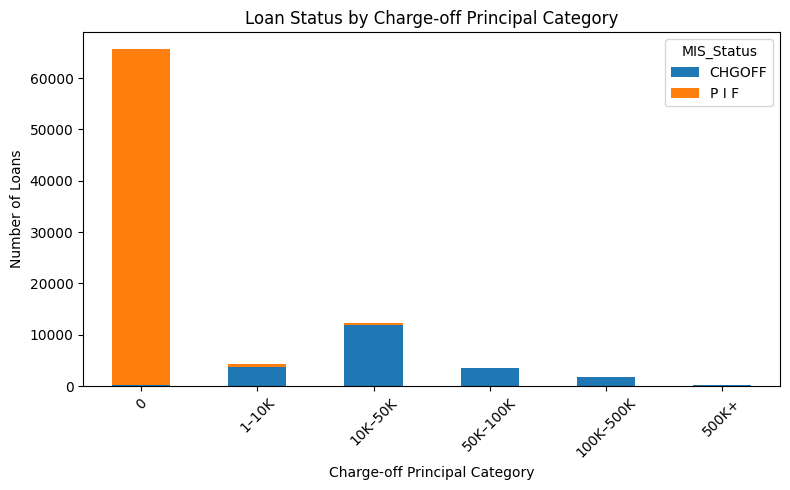

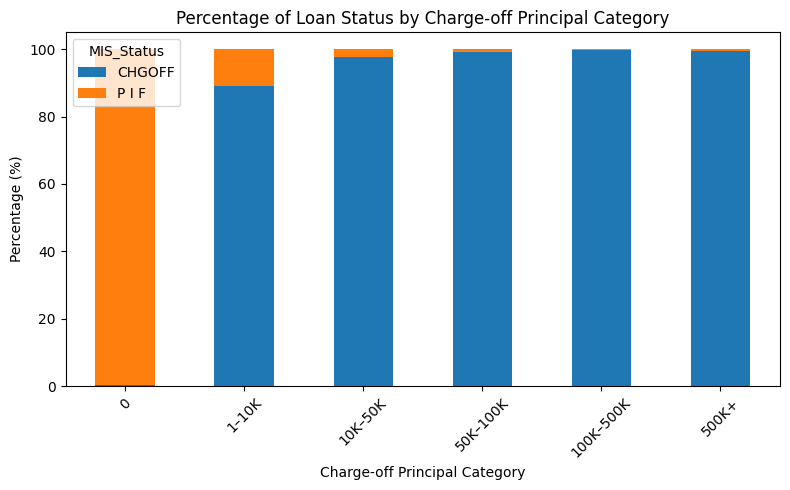

In [ ]:
# Convert ChgOffPrinGr to numeric after removing '$' and ',' characters
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].replace('[\$,]', '', regex=True).astype(float)

# Create categories for charge-off principal
bins = [0, 1, 10000, 50000, 100000, 500000, df['ChgOffPrinGr'].max()]
labels = ['0', '1–10K', '10K–50K', '50K–100K', '100K–500K', '500K+']
df['ChgOffPrinGr_Category'] = pd.cut(df['ChgOffPrinGr'], bins=bins, labels=labels, include_lowest=True)

# Cross-tabulation between charge-off amount and loan status
chgoff_status = pd.crosstab(df['ChgOffPrinGr_Category'], df['MIS_Status'])

# Calculate percentage
chgoff_status_perc = chgoff_status.div(chgoff_status.sum(axis=1), axis=0) * 100

print(chgoff_status)
print("\nPercentage by Charge-off Principal Category:")
print(chgoff_status_perc)


# Plot stacked bar chart for counts
chgoff_status.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title("Loan Status by Charge-off Principal Category")
plt.xlabel("Charge-off Principal Category")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()

# Plot stacked bar chart for percentages
chgoff_status_perc.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5))

plt.title("Percentage of Loan Status by Charge-off Principal Category")
plt.xlabel("Charge-off Principal Category")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء عمود جديد باسم ChgOffPrinGr_Category بعد تحويل قيم ChgOffPrinGr إلى أرقام وتقسيمها إلى فئات حسب قيمة مبلغ التعثر. عند دراسة العلاقة بين هذا العمود وحالة القرض (MIS_Status)، تبين أن القروض التي لا تحتوي على أي تعثر (ChgOffPrinGr = 0) كانت تقريبًا جميعها مسددة بالكامل بنسبة ‎99.8%‎. بينما القروض التي لديها أي مبلغ تعثر، حتى لو بسيط (من ‎1‎ إلى ‎10K‎ فأكثر)، كانت نسب التعثر (CHGOFF) فيها مرتفعة جدًا، تتجاوز ‎89%‎ وتصل إلى ‎99%‎ في الفئات الأعلى.
هذا يؤكد أن وجود أي مبلغ تعثر في القرض يرتبط مباشرة بزيادة احتمالية فشل السداد.
__________________________________________________________


A new column named ChgOffPrinGr_Category was created after converting the ChgOffPrinGr values into numeric form and grouping them into categories based on the charge-off amount. The relationship with MIS_Status showed that loans with no charge-off (ChgOffPrinGr = 0) were almost fully paid off (99.8% PIF). In contrast, loans with any positive charge-off amount, even small ones (from 1–10K and above), had extremely high charge-off rates, ranging from 89% to over 99%.
This clearly indicates that the presence of any charge-off amount strongly correlates with loan default.

MIS_Status       CHGOFF  P I F
GrAppv_Category               
Very Small        14066  34297
Small              4998  17641
Medium             1371   8062
Large               683   5540
Very Large           89    784

Percentage by Approved Amount Category:
MIS_Status          CHGOFF      P I F
GrAppv_Category                      
Very Small       29.084217  70.915783
Small            22.076947  77.923053
Medium           14.534082  85.465918
Large            10.975414  89.024586
Very Large       10.194731  89.805269


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2263125167.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)


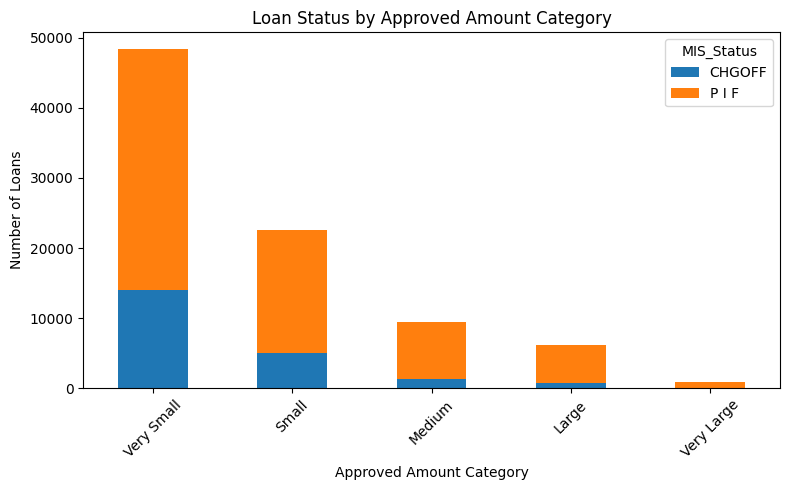

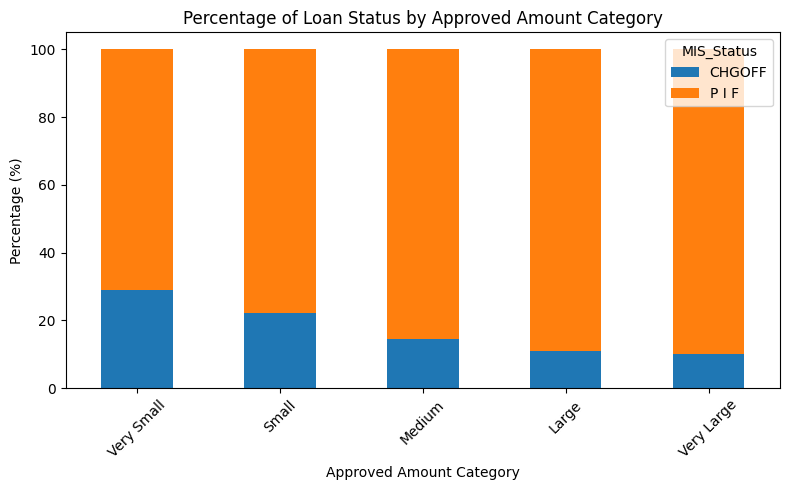

In [ ]:
# Convert GrAppv to numeric after removing $ and , symbols
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

# Create loan amount categories
bins = [0, 50000, 150000, 350000, 1000000, df['GrAppv'].max()]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
df['GrAppv_Category'] = pd.cut(df['GrAppv'], bins=bins, labels=labels, include_lowest=True)

# Cross-tab between approval amount category and loan status
grappv_status = pd.crosstab(df['GrAppv_Category'], df['MIS_Status'])

# Calculate percentage distribution
grappv_status_perc = grappv_status.div(grappv_status.sum(axis=1), axis=0) * 100

print(grappv_status)
print("\nPercentage by Approved Amount Category:")
print(grappv_status_perc)



# Plot stacked bar chart for counts
grappv_status.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title("Loan Status by Approved Amount Category")
plt.xlabel("Approved Amount Category")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()

# Plot stacked bar chart for percentages
grappv_status_perc.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title("Percentage of Loan Status by Approved Amount Category")
plt.xlabel("Approved Amount Category")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء عمود جديد باسم GrAppv_Category بعد تحويل قيم GrAppv إلى أرقام وتقسيمها إلى فئات حسب قيمة المبلغ الموافق عليه للقرض. بعد دراسة العلاقة بين GrAppv_Category وMIS_Status، تبين أن القروض الصغيرة جدًا (Very Small) لديها أعلى نسبة تعثر (CHGOFF) تبلغ حوالي ‎29%‎، بينما تقل النسبة تدريجيًا مع زيادة حجم القرض لتصل إلى حوالي ‎10%‎ في القروض الكبيرة جدًا (Very Large).
هذا يشير إلى أن القروض الصغيرة أكثر عرضة للتعثر مقارنة بالقروض الكبيرة، والتي تميل إلى أن تكون أكثر استقرارًا من حيث السداد.
__________________________________________________________

A new column called GrAppv_Category was created after converting the GrAppv values into numeric form and grouping them by approved loan size. The relationship between GrAppv_Category and MIS_Status shows that very small loans have the highest charge-off rate (around 29%), while the rate decreases steadily as the loan amount increases, reaching about 10% for very large loans.
This indicates that smaller approved loans tend to have higher default rates, while larger loans are generally more stable and more likely to be fully paid off.

MIS_Status         CHGOFF  P I F
SBA_Appv_Category               
Very Small          17451  42402
Small                2117  12575
Medium               1048   6413
Large                 554   4699
Very Large             37    235

Percentage by SBA Approved Amount Category:
MIS_Status            CHGOFF      P I F
SBA_Appv_Category                      
Very Small         29.156433  70.843567
Small              14.409202  85.590798
Medium             14.046374  85.953626
Large              10.546354  89.453646
Very Large         13.602941  86.397059


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-392947872.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)


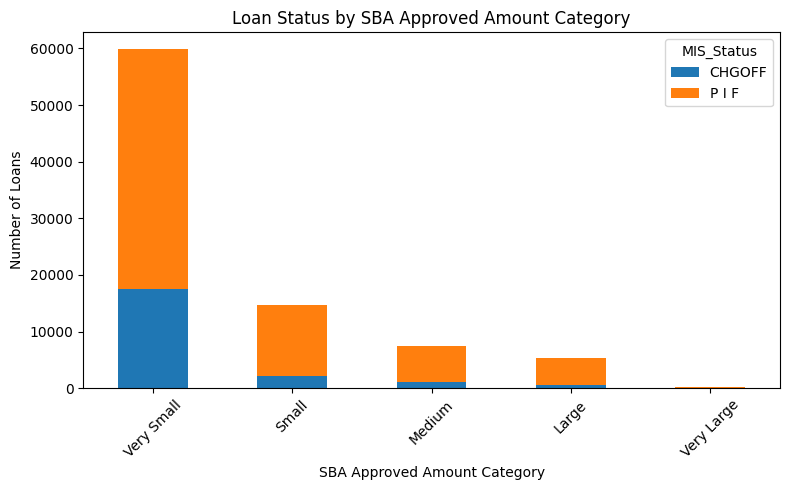

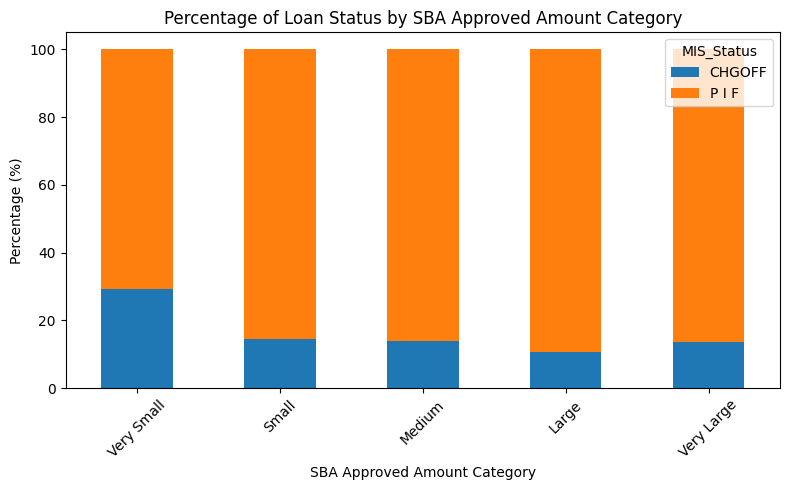

In [ ]:
# Convert SBA_Appv to numeric after removing $ and , symbols
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

# Create categories for SBA approved loan amounts
bins = [0, 50000, 150000, 350000, 1000000, df['SBA_Appv'].max()]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
df['SBA_Appv_Category'] = pd.cut(df['SBA_Appv'], bins=bins, labels=labels, include_lowest=True)

# Cross-tabulation between SBA approval amount category and loan status
sba_status = pd.crosstab(df['SBA_Appv_Category'], df['MIS_Status'])

# Calculate percentage distribution
sba_status_perc = sba_status.div(sba_status.sum(axis=1), axis=0) * 100

print(sba_status)
print("\nPercentage by SBA Approved Amount Category:")
print(sba_status_perc)



# Plot stacked bar chart for counts
sba_status.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title("Loan Status by SBA Approved Amount Category")
plt.xlabel("SBA Approved Amount Category")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()

# Plot stacked bar chart for percentages
sba_status_perc.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title("Percentage of Loan Status by SBA Approved Amount Category")
plt.xlabel("SBA Approved Amount Category")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="MIS_Status")
plt.tight_layout()
plt.show()


قمت بإنشاء عمود جديد باسم SBA_Appv_Category بعد تحويل قيم SBA_Appv إلى أرقام وتقسيمها إلى فئات حسب قيمة المبلغ المعتمد من وكالة SBA. بعد تحليل العلاقة بين SBA_Appv_Category وMIS_Status، وُجد أن القروض الصغيرة جدًا (Very Small) لديها أعلى نسبة تعثر (CHGOFF) حوالي ‎29%‎، بينما القروض الأكبر (خاصة Large) أظهرت نسب تعثر أقل حوالي ‎10%‎ مع ارتفاع نسبة السداد الكامل (P I F) إلى أكثر من ‎89%‎.
هذا يشير إلى أن القروض ذات المبالغ الصغيرة أكثر عرضة للتعثر مقارنة بالقروض ذات المبالغ الكبيرة التي تميل إلى تحقيق سداد أفضل.
__________________________________________________________

A new column named SBA_Appv_Category was created after converting SBA_Appv values into numeric form and grouping them by SBA-approved loan size. The relationship between SBA_Appv_Category and MIS_Status shows that very small loans have the highest charge-off rate (around 29%), while larger loans—especially those in the "Large" category—have much lower charge-off rates (about 10%) and higher full repayment rates (around 89%).
This indicates that smaller SBA-approved loans are more prone to default, whereas larger loans tend to perform better in repayment.

In [ ]:
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,7
City,2
State,3
Zip,1
Bank,93
BankState,93
NAICS,1
ApprovalDate,1
ApprovalFY,1
